### 0512 setting 要留

In [151]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
import json

In [152]:
init_types = ['dueweight', 'due', 'dueinitprodtime']
maint_types = ['greedy', 'rij', 'distributed', 'random', 'all']  # 'notabu',

# init_types = ['dueweight']
# maint_types = ['greedy_2020', 'greedy_2010']  # 'notabu',

types = []  # 'init_prod_time_notabu'
type_pairs = [[], []]
for init_type in init_types:
    for maint_type in maint_types:
        types.append(f'{init_type}_{maint_type}')
        type_pairs[0].append(init_type)
        type_pairs[1].append(maint_type)
types.append('gurobi')
type_pairs[0].append('gurobi')
type_pairs[1].append('gurobi')

In [153]:
# pd.DataFrame(pd.read_csv('model/0627_30min_bestbd.csv')).iloc[:5, :]

In [154]:
file_name = 'tabu/0706_allscen/' #'0701_2020/'  # 0512_allscen
record = '_obj'
for type in types[:-1]:
    globals()[type + '_df'] = np.maximum(pd.DataFrame(
        pd.read_csv(file_name + type + record + '.csv')), 1)

In [155]:
gurobi_file_name = 'model/0627_30min'   #'model/0627_30min, 0702U_30min'
gurobi_df = np.maximum(pd.DataFrame(pd.read_csv(gurobi_file_name + '_bestbd' + '.csv')).iloc[:30, :], 1)

In [156]:
gurobi_df.describe()

,benchmark,init_prod_time_L,init_prod_time_H,prod_discount_L,prod_discount_H,weight_L,weight_H,due_time_L,due_time_H,maint_len_L,maint_len_H
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1702.683085,1646.542417,2040.428252,2088.615001,1954.928883,1834.405563,1799.154606,2174.420205,1281.702213,1893.004239,1711.820723
std,765.716582,456.187431,1250.790852,699.921230,775.189920,663.394193,866.463027,680.804886,858.594740,765.976161,885.672933
min,523.966152,669.430318,456.862575,561.504216,209.001358,597.099108,287.286839,1117.037683,106.758647,381.340008,441.531645
25%,1074.618476,1507.456048,1062.636747,1612.932122,1331.848141,1348.977143,1103.075980,1741.409965,556.270793,1381.014511,988.533566
50%,1688.758451,1696.234661,1499.878133,2286.950057,2039.879148,1681.909032,1711.729096,2214.488827,1097.893115,2145.911440,1544.332531
75%,2203.257526,1884.326333,3379.362294,2600.322322,2566.114793,2470.463055,2529.220452,2538.467032,2037.298423,2465.139983,2399.567110
max,3073.657505,2553.232862,4225.481073,3264.863833,3463.799518,3002.972008,3346.605964,4122.811589,2886.987609,2958.867907,3924.738951


In [157]:
dueweight_greedy_df.describe()

,benchmark,init_prod_time_L,init_prod_time_H,prod_discount_L,prod_discount_H,weight_L,weight_H,due_time_L,due_time_H,maint_len_L,maint_len_H
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1457.798942,1372.121076,2738.813450,1788.351452,1479.330443,1893.780039,1760.584093,8848.422379,26.894183,1606.337975,1626.223393
std,1396.931044,1136.978654,2944.937876,1762.608508,1409.144000,2031.378267,1613.633436,2210.348224,86.246831,2193.777141,1876.414572
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5424.789817,1.000000,1.000000,1.000000
25%,335.858854,392.281469,274.962663,508.532715,373.108965,227.870347,455.882300,7175.976016,1.000000,159.227629,73.846379
50%,1239.946941,1204.928190,1654.781224,1561.599476,1168.050903,1493.020667,1344.464822,8575.839546,1.000000,507.224746,681.058597
75%,2048.902334,2148.771322,4402.877256,2083.532463,1948.640460,2488.784423,3107.646189,10189.079477,1.000000,2126.360576,2802.166580
max,5771.061024,4214.559607,10262.992504,7577.367771,6183.160709,7678.335828,4894.463338,14382.433525,357.686598,8507.174691,7962.806919


### 有 -1

In [158]:
ratio_avg = []
ratio_sig = []
for type in types:
# 有正負
# ratio_avg.append(np.average((globals()[type + '_df'].values-gurobi_df.values)/(gurobi_df.values), axis=0))
# ratio_sig.append(np.var((globals()[type + '_df'].values-gurobi_df.values)/(gurobi_df.values), axis=0))
# ratio_avg.append(np.average(np.maximum(globals()[type + '_df'].values-gurobi_df.values, 0)/(gurobi_df.values), axis=0))
# ratio_sig.append(np.var(np.maximum(globals()[type + '_df'].values-gurobi_df.values, 0)/(gurobi_df.values), axis=0))
# 分母 z(best)
# ratio_avg.append(np.average((globals()[type + '_df'].values-gurobi_df.values)/(globals()[type + '_df'].values), axis=0))
# ratio_sig.append(np.std((globals()[type + '_df'].values-gurobi_df.values)/(globals()[type + '_df'].values), axis=0))
    ratio_avg.append(np.average(np.maximum(globals()[type + '_df'].values-gurobi_df.values, 0)/(globals()[type + '_df'].values), axis=0))
    ratio_sig.append(np.var(np.maximum(globals()[type + '_df'].values-gurobi_df.values, 0)/(globals()[type + '_df'].values), axis=0))

In [159]:
type = 'dueweight_greedy'
avg_df = pd.DataFrame(np.maximum(globals()[type + '_df'].values-gurobi_df.values, 0)/(globals()[type + '_df'].values))
sig_df = pd.DataFrame(np.maximum(globals()[type + '_df'].values-gurobi_df.values, 0)/(globals()[type + '_df'].values))

In [160]:
# avg_df

In [161]:
col_name = list(dueweight_greedy_df.columns)
col_name[0] = 'base_case'

In [162]:
### TIME
file_name = 'model/0627_30min' #'tabu/0701_2020/'#'model/0627_30min, 0702U_30min' #'tabu/0512_allscen/'
record = '_runtime'
type = '' #'dueweight_greedy'

runtime_df = pd.DataFrame(pd.read_csv(file_name + type + record + '.csv'))
runtime_df = runtime_df.reindex(
    columns=['benchmark', 'init_prod_time_H', 'init_prod_time_L', 'prod_discount_H',
             'prod_discount_L', 'weight_H', 'weight_L', 'due_time_L', 'due_time_H',
             'maint_len_H', 'maint_len_L',
    ])
runtime_df.rename(columns = {
    'benchmark':'Base', 'init_prod_time_H':'BL', 'init_prod_time_L':'BS',
    'prod_discount_H':'DDL', 'prod_discount_L':'DDS', 'weight_H':'TPDL', 'weight_L':'TPDS',
    'due_time_L':'OU','due_time_H':'ONU', 
    'maint_len_H':'MLDL', 'maint_len_L':'MLDS',}, inplace = True)
# print(runtime_df.mean().mean())
runtime_df.mean()

Base     958.666748
BL      1229.480670
BS      1254.185723
DDL     1001.829583
DDS     1287.589062
TPDL    1131.914332
TPDS    1253.599473
OU      1800.089059
ONU      311.360600
MLDL    1095.457590
MLDS    1178.062211
dtype: float64

In [169]:
### TIME Tabu
file_name = 'tabu/0706_allscen/' #'tabu/0701_2020/'#'model/0627_30min' #'tabu/0512_allscen/'
record = '_runtime'
type = 'dueweight_greedy'

taburuntime_df = pd.DataFrame(pd.read_csv(file_name + type + record + '.csv'))
taburuntime_df = taburuntime_df.reindex(
    columns=['benchmark', 'init_prod_time_H', 'init_prod_time_L', 'prod_discount_H',
             'prod_discount_L', 'weight_H', 'weight_L', 'due_time_L', 'due_time_H',
             'maint_len_H', 'maint_len_L',
    ])
taburuntime_df.rename(columns = {
    'benchmark':'Base', 'init_prod_time_H':'BL', 'init_prod_time_L':'BS',
    'prod_discount_H':'DDL', 'prod_discount_L':'DDS', 'weight_H':'TPDL', 'weight_L':'TPDS',
    'due_time_L':'OU','due_time_H':'ONU', 
    'maint_len_H':'MLDL', 'maint_len_L':'MLDS',}, inplace = True)
# print(runtime_df.mean().mean())
print(pd.DataFrame(pd.read_csv(file_name + 'dueweight_greedy_ONU' + record + '.csv')).mean())
taburuntime_df.mean()

due_time_H    112.269283
dtype: float64


Base    164.472573
BL      133.892188
BS      170.011979
DDL     149.904443
DDS     156.901302
TPDL    142.765479
TPDS    142.925213
OU      175.899801
ONU      26.986612
MLDL    132.943866
MLDS    165.110423
dtype: float64

In [164]:
ratio_avg_df = pd.DataFrame(ratio_avg, columns=col_name)
ratio_avg_df.index = Series(types)
ratio_avg_df['init_type'] = type_pairs[0]
ratio_avg_df['maint_type'] = type_pairs[1]
ratio_avg_df = ratio_avg_df.reindex(
    columns=['base_case', 'init_prod_time_H', 'init_prod_time_L', 'prod_discount_H',
             'prod_discount_L', 'weight_H', 'weight_L', 'due_time_L', 'due_time_H',
             'maint_len_H', 'maint_len_L',
    ])

ratio_sig_df = pd.DataFrame(ratio_sig, columns=col_name)
ratio_sig_df.index = Series(types)
ratio_sig_df['init_type'] = type_pairs[0]
ratio_sig_df['maint_type'] = type_pairs[1]
ratio_sig_df = ratio_sig_df.reindex(
    columns=['base_case', 'init_prod_time_H', 'init_prod_time_L', 'prod_discount_H',
             'prod_discount_L', 'weight_H', 'weight_L', 'due_time_L', 'due_time_H',
             'maint_len_H', 'maint_len_L',
    ])

ratio_avg_df.rename(columns = {
    'base_case':'Base', 'init_prod_time_H':'BL', 'init_prod_time_L':'BS',
    'prod_discount_H':'DDL', 'prod_discount_L':'DDS', 'weight_H':'TPDL', 'weight_L':'TPDS',
    'due_time_L':'OU', 'due_time_H':'ONU',
    'maint_len_H':'MLDL', 'maint_len_L':'MLDS',}, inplace = True)


ratio_sig_df.rename(columns = {
    'base_case':'Base', 'init_prod_time_H':'BL', 'init_prod_time_L':'BS',
    'prod_discount_H':'DDL', 'prod_discount_L':'DDS', 'weight_H':'TPDL', 'weight_L':'TPDS',
    'due_time_L':'OU', 'due_time_H':'ONU',
    'maint_len_H':'MLDL', 'maint_len_L':'MLDS',}, inplace = True)

### 表現 Ratio $(z-z_{LB}) / z$

In [165]:
# mingap_df = pd.read_csv('model/0627_30min_mingap.csv')
# mingap_df.reindex(
#     columns=['benchmark', 'init_prod_time_H', 'init_prod_time_L', 'prod_discount_H',
#              'prod_discount_L', 'weight_H', 'weight_L', 'due_time_L', 'due_time_H',
#              'maint_len_H', 'maint_len_L',
#     ])
# mingap_df.rename(columns = {
#     'benchmark':'Base', 'init_prod_time_H':'BL', 'init_prod_time_L':'BS',
#     'prod_discount_H':'DDL', 'prod_discount_L':'DDS', 'weight_H':'TPDL', 'weight_L':'TPDS',
#     'due_time_L':'OU', 'due_time_H':'ONU',
#     'maint_len_H':'MLDL', 'maint_len_L':'MLDS',}, inplace = True)
# mingap_df.describe().T

In [166]:
df = ratio_avg_df.loc[['dueweight_greedy'], :].T.round(4) #.iloc[:-2, :].mean()
# ratio_avg_df.loc[['dueweight_greedy_2020', 'dueweight_greedy_2010'], :].T #.iloc[:-2, :].mean()

In [167]:
df['sig'] = ratio_sig_df.loc[['dueweight_greedy'], :].T.round(4) #.iloc[:-2, :] #.mean()
# ratio_sig_df.loc[['dueweight_greedy_2020', 'dueweight_greedy_2010'], :].T #.iloc[:-2, :].mean()

In [172]:
df.loc['ONU', 'dueweight_greedy'] = 0.0121
df.loc['ONU', 'sig'] = 0.0042
df['tabutime'] = taburuntime_df.mean().round(4)
df['MIPtime'] = runtime_df.mean().round(4)
df.loc['ONU', 'tabutime'] = 112.2693
df #.mean().round(4)

dueweight_greedy       0.1798
sig                    0.0408
tabutime             149.7361
MIPtime             1136.5668
dtype: float64

### Tabu 比較 沒-1

In [58]:
tabu_ratio_avg = []
tabu_ratio_sig = []
for type in types[:-1]:
    # ratio_avg.append(np.average(globals()[type + '_df'].values/init_prod_time_notabu_df.values, axis=0))
    # ratio_sig.append(np.var(globals()[type + '_df'].values/init_prod_time_notabu_df.values, axis=0))
    tabu_ratio_avg.append(np.average((globals()[type + '_df'].values)/(dueweight_greedy_df.values), axis=0))
    tabu_ratio_sig.append(np.var((globals()[type + '_df'].values)/(dueweight_greedy_df.values), axis=0))

In [59]:
# np.maximum(dueweight_greedy_df, gurobi_df)

In [60]:
# dueweight_greedy_df
# types

In [61]:
tabu_ratio_avg_df = pd.DataFrame(tabu_ratio_avg, columns=col_name)
tabu_ratio_avg_df.index = Series(types[:-1])
tabu_ratio_avg_df = tabu_ratio_avg_df.reindex(
    columns=['base_case', 'init_prod_time_H', 'init_prod_time_L', 'prod_discount_H',
             'prod_discount_L', 'weight_H', 'weight_L', 'due_time_L', 'due_time_H',
             'maint_len_H', 'maint_len_L',
    ])

tabu_ratio_avg_df['init_type'] = type_pairs[0][:-1]
tabu_ratio_avg_df['maint_type'] = type_pairs[1][:-1]

tabu_ratio_sig_df = pd.DataFrame(tabu_ratio_sig, columns=col_name)
tabu_ratio_sig_df.index = Series(types[:-1])
tabu_ratio_sig_df = tabu_ratio_sig_df.reindex(
    columns=['base_case', 'init_prod_time_H', 'init_prod_time_L', 'prod_discount_H',
             'prod_discount_L', 'weight_H', 'weight_L', 'due_time_L', 'due_time_H',
             'maint_len_H', 'maint_len_L',
    ])

tabu_ratio_sig_df['init_type'] = type_pairs[0][:-1]
tabu_ratio_sig_df['maint_type'] = type_pairs[1][:-1]

tabu_ratio_avg_df.rename(columns = {
    'base_case':'Base', 'init_prod_time_H':'BL', 'init_prod_time_L':'BS',
    'prod_discount_H':'DDL', 'prod_discount_L':'DDS', 'weight_H':'TPDL', 'weight_L':'TPDS',
    'due_time_L':'OU', 'due_time_H':'ONU',
    'maint_len_H':'MLDL', 'maint_len_L':'MLDS',}, inplace = True)


tabu_ratio_sig_df.rename(columns = {
    'base_case':'Base', 'init_prod_time_H':'BL', 'init_prod_time_L':'BS',
    'prod_discount_H':'DDL', 'prod_discount_L':'DDS', 'weight_H':'TPDL', 'weight_L':'TPDS',
    'due_time_L':'OU', 'due_time_H':'ONU',
    'maint_len_H':'MLDL', 'maint_len_L':'MLDS',}, inplace = True)

# tabu_ratio_avg_df.head()

In [62]:
dict_init = {"dueweight": "1_WEDD", "due": "2_EDD", "dueinitprodtime": "3_LSTR"}
dict_maint = {"greedy": "1_greedy", "rij": "2_profit-oriented", "distributed": "3_distributed",
              "random": "4_random", "all": "5_earliest"}
tabu_ratio_avg_df_2 = tabu_ratio_avg_df.replace({"init_type": dict_init, "maint_type": dict_maint}).round(2)

In [63]:
tabu_ratio_avg_df_2 = tabu_ratio_avg_df_2[tabu_ratio_avg_df_2["maint_type"]!="notabu"]

In [64]:
tabu_ratio_avg_df_2 = tabu_ratio_avg_df_2.sort_values(by=["init_type", "maint_type"]) #.iloc[:-2, :].mean()

#### 根據 job listing 初始化方式平均

In [65]:
tabu_ratio_avg_df_2 #.iloc[:, :]

,Base,BL,BS,DDL,DDS,TPDL,TPDS,OU,ONU,MLDL,MLDS,init_type,maint_type
dueweight_greedy,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1_WEDD,1_greedy
dueweight_rij,1.07,1.12,0.90,0.98,1.19,5.73,2.39,1.00,1.45,1.38,1.77,1_WEDD,2_profit-oriented
dueweight_distributed,1.09,1.12,1.05,1.38,1.19,3.27,2.39,1.00,1.45,1.38,1.73,1_WEDD,3_distributed
dueweight_random,1.07,1.12,1.06,1.00,1.19,5.25,2.39,1.00,1.44,1.26,1.38,1_WEDD,4_random
dueweight_all,1.15,1.10,1.21,3.29,1.17,5.72,2.38,1.00,3.25,1.37,1.45,1_WEDD,5_earliest
due_greedy,1.12,0.98,1.13,3.19,0.87,4.48,1.08,0.98,2.23,1.01,0.94,2_EDD,1_greedy
due_rij,1.08,1.12,0.90,0.99,1.19,5.72,2.39,1.00,1.45,1.38,1.45,2_EDD,2_profit-oriented
due_distributed,1.09,1.12,1.07,1.09,1.19,3.53,2.39,1.00,1.45,1.39,1.44,2_EDD,3_distributed
due_random,1.09,1.12,0.99,0.99,1.19,5.14,2.39,1.00,1.45,1.31,1.39,2_EDD,4_random
due_all,1.15,1.10,1.21,3.29,1.17,5.72,2.38,1.00,3.25,1.37,1.45,2_EDD,5_earliest


In [228]:
tabu_ratio_avg_df_2.iloc[:, :].groupby('init_type').mean().round(2)  #.sort_values(['base_case'])

,Base,BL,BS,DDL,DDS,TPDL,TPDS,OU,ONU,MLDL,MLDS
init_type,,,,,,,,,,,
1_WEDD,1.09,1.09,1.04,1.07,1.35,3.42,3.11,1.02,1.39,1.28,2.85
2_EDD,1.12,1.09,1.04,1.07,1.35,4.17,3.15,1.03,1.39,1.30,3.40
3_LSTR,1.11,1.09,1.06,1.08,1.36,3.95,3.07,1.02,1.39,1.30,3.39


#### 根據保養排程策略平均

In [227]:
tabu_ratio_avg_df_2.iloc[:, :].groupby('maint_type').mean().round(2)  #.sort_values(['base_case'])

,Base,BL,BS,DDL,DDS,TPDL,TPDS,OU,ONU,MLDL,MLDS
maint_type,,,,,,,,,,,
1_greedy,1.06,1.00,1.01,1.00,1.00,2.23,1.06,1.00,0.98,1.01,0.98
2_profit-oriented,1.11,1.12,1.00,1.07,1.45,4.66,3.63,1.03,1.34,1.39,4.02
3_distributed,1.12,1.12,1.07,1.10,1.45,3.10,3.62,1.03,1.34,1.38,4.01
4_random,1.11,1.12,1.07,1.08,1.45,4.60,3.62,1.03,1.34,1.32,3.05
5_earliest,1.13,1.10,1.08,1.12,1.43,4.65,3.62,1.03,1.94,1.38,4.00


#### 根據保養排程策略平均

In [28]:
# ratio_avg_df.groupby('maint_type').mean().sort_values(['base_case'])

### base: gurobi

In [43]:
# dueweight_notabu
ratio_avg2 = []
for type in types[1:]:
    ratio_avg2.append(np.average(globals()[type + '_df'].values/gurobi_df.values, axis=0))
ratio_avg_df2 = pd.DataFrame(ratio_avg2, columns=col_name)
ratio_avg_df2.index = Series(types[1:])
ratio_avg_df2['init_type'] = type_pairs[0]
ratio_avg_df2['maint_type'] = type_pairs[1]

In [44]:
ratio_avg_df2

,base_case,init_prod_time_L,init_prod_time_H,prod_discount_L,prod_discount_H,weight_L,weight_H,due_time_L,due_time_H,maint_len_L,maint_len_H,init_type,maint_type
due_notabu,0.327627,0.529115,0.274211,0.384889,0.340710,0.364557,0.376251,0.795653,0.005915,0.328677,0.353830,due,notabu
due_greedy,0.254986,0.399079,0.228292,0.299243,0.261754,0.295307,0.257051,0.673904,0.003926,0.267514,0.282154,due,greedy
due_all,0.281512,0.439027,0.238448,0.328694,0.295018,0.326760,0.287908,0.687294,0.005538,0.281034,0.305249,due,all
due_rij,0.284406,0.412579,0.240640,0.331267,0.287633,0.328893,0.290916,0.687953,0.003383,0.283636,0.308323,due,rij
due_random,0.283907,0.440291,0.240640,0.331267,0.290483,0.328893,0.290662,0.689569,0.003354,0.281921,0.308081,due,random
due_distributed,0.284505,0.441013,0.240640,0.331267,0.298191,0.328893,0.289044,0.689827,0.003383,0.283263,0.308977,due,distributed
dueweight_notabu,0.477632,0.719985,0.326746,0.523286,0.487889,0.364557,0.611110,0.755606,0.050230,0.492710,0.473869,dueweight,notabu
dueweight_greedy,0.252863,0.403799,0.228484,0.299148,0.262256,0.294853,0.254731,0.671220,0.004443,0.263252,0.281124,dueweight,greedy
dueweight_all,0.281633,0.438998,0.238482,0.328924,0.294903,0.326745,0.287529,0.687282,0.005538,0.281034,0.305386,dueweight,all
dueweight_rij,0.282557,0.413465,0.239646,0.332726,0.286331,0.328893,0.290311,0.687089,0.003383,0.283377,0.307373,dueweight,rij


#### 根據 job listing 初始化方式平均

In [45]:
ratio_avg_df2.groupby('init_type').mean().sort_values(['base_case'])

,base_case,init_prod_time_L,init_prod_time_H,prod_discount_L,prod_discount_H,weight_L,weight_H,due_time_L,due_time_H,maint_len_L,maint_len_H
init_type,,,,,,,,,,,
due,0.286157,0.443517,0.243812,0.334438,0.295631,0.328884,0.298639,0.704033,0.004250,0.287674,0.311102
dueinitprodtime,0.296864,0.466472,0.247336,0.340257,0.306109,0.338253,0.305838,0.704952,0.006183,0.298638,0.318180
dueweight,0.310003,0.475364,0.252108,0.358256,0.320352,0.328805,0.336931,0.696497,0.011680,0.314035,0.329964
gurobi,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 移除沒有使用 Tabu 的情境

In [46]:
ratio_avg_df2[ratio_avg_df2['maint_type'] != 'notabu'].groupby('init_type').mean().sort_values(['base_case'])

,base_case,init_prod_time_L,init_prod_time_H,prod_discount_L,prod_discount_H,weight_L,weight_H,due_time_L,due_time_H,maint_len_L,maint_len_H
init_type,,,,,,,,,,,
dueweight,0.276477,0.426440,0.237181,0.325250,0.286844,0.321655,0.282095,0.684675,0.003970,0.278300,0.301182
dueinitprodtime,0.277611,0.428802,0.237706,0.324297,0.285645,0.319996,0.282613,0.684894,0.003961,0.277919,0.300731
due,0.277863,0.426398,0.237732,0.324348,0.286616,0.321749,0.283116,0.685709,0.003917,0.279474,0.302557
gurobi,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 根據保養排程策略平均

In [47]:
ratio_avg_df2.groupby('maint_type').mean().sort_values(['base_case'])

,base_case,init_prod_time_L,init_prod_time_H,prod_discount_L,prod_discount_H,weight_L,weight_H,due_time_L,due_time_H,maint_len_L,maint_len_H
maint_type,,,,,,,,,,,
greedy,0.253655,0.403677,0.228428,0.299627,0.262006,0.294881,0.255986,0.671777,0.004249,0.264617,0.281404
all,0.281625,0.438940,0.238528,0.328730,0.295001,0.326755,0.287900,0.687284,0.005538,0.281034,0.305278
random,0.283660,0.438218,0.240248,0.331600,0.292101,0.327485,0.289869,0.689337,0.003280,0.281480,0.305099
rij,0.283767,0.412916,0.240248,0.331600,0.286864,0.328842,0.290187,0.687596,0.003383,0.283368,0.307472
distributed,0.283879,0.442316,0.240248,0.331600,0.295869,0.327704,0.289099,0.689471,0.003297,0.282323,0.308198
notabu,0.399463,0.634641,0.298813,0.442744,0.412342,0.386217,0.469775,0.785500,0.024479,0.407873,0.411042
gurobi,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### due_time 效益差距大
due_time_L: 傾向提早修理，演算法效益小\
due_time_H: 傾向晚修理，演算法效益大

In [59]:
dueweight_greedy_maint_sol_df = pd.DataFrame(pd.read_csv(file_name + 'dueweight_greedy_maint_sol.csv'))

In [60]:
dueweight_greedy_maint_sol_df

,benchmark,init_prod_time_L,init_prod_time_H,prod_discount_L,prod_discount_H,weight_L,weight_H,due_time_L,due_time_H,maint_len_L,maint_len_H
0,[0. 0. 0. 0. 0.],[19. 19. 0. 0. 0.],[0. 0. 2. 0. 0.],[2. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 4.],[0. 3. 3. 0. 0.],[3. 0. 0. 0. 0.],[2. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
1,[0. 0. 0. 1. 1.],[ 0. 0. 0. 19. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[2. 2. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[1. 0. 0. 0. 0.],[2. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
2,[3. 3. 0. 0. 0.],[1. 0. 0. 0. 0.],[0. 0. 1. 0. 0.],[ 1. 7. 0. 19. 0.],[2. 7. 0. 0. 0.],[0. 0. 0. 0. 3.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[ 0. 0. 11. 11. 0.],[0. 1. 0. 0. 0.],[0. 0. 0. 0. 0.]
3,[0. 0. 0. 0. 0.],[ 0. 0. 0. 0. 19.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[ 0. 0. 2. 19. 0.],[0. 0. 0. 0. 0.],[1. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[19. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
4,[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[2. 0. 0. 0. 0.],[ 0. 0. 0. 16. 0.],[1. 1. 0. 0. 0.],[0. 0. 5. 0. 0.],[5. 4. 0. 0. 0.],[0. 0. 0. 0. 0.],[2. 0. 0. 0. 0.]
5,[ 0. 19. 0. 0. 0.],[19. 0. 0. 0. 0.],[1. 0. 0. 0. 0.],[3. 0. 0. 0. 0.],[19. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[1. 1. 0. 1. 1.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
6,[0. 0. 0. 0. 0.],[ 3. 0. 19. 0. 0.],[1. 0. 0. 0. 0.],[1. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 9. 0. 0.],[0. 0. 0. 0. 0.],[ 2. 7. 0. 17. 0.]
7,[3. 0. 0. 0. 0.],[18. 0. 0. 0. 0.],[1. 1. 0. 0. 0.],[ 0. 0. 19. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 5. 0. 0.],[2. 0. 2. 0. 0.],[0. 0. 0. 0. 0.],[1. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[ 0. 12. 18. 19. 0.]
8,[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[18. 0. 0. 0. 7.],[5. 0. 0. 0. 0.],[ 0. 19. 0. 0. 0.],[2. 2. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
9,[3. 0. 0. 0. 0.],[19. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]


## 計算

In [92]:
def combine(maint_types, pairs, record, scen='benchmark', relax_type='model', data='/0211_30min'):
    print(record[1:] + '\n')
    try:
        # benchmark
        globals()[record[1:] + '_df'] = pd.DataFrame(pd.read_csv(relax_type + data + record + '.csv').loc[:, scen])  # .iloc[:, 0]
    except:
        globals()[record[1:] + '_df'] = pd.DataFrame(columns=maint_types)

    for maint_type in maint_types:
        for pair in pairs:
            globals()[record[1:] + '_df'][maint_type + pair] = globals()[maint_type + pair + record + '_df'].loc[:, scen]
    return globals()[record[1:] + '_df']

In [93]:
def describe_df(maint_type, pair, record):
    print(maint_type + pair + record + '\n')
    return globals()[maint_type + pair + record + '_df'].describe()

In [94]:
# ['benchmark', 'init_prod_time_L', 'init_prod_time_H',
# 'prod_discount_L', 'prod_discount_H', 'weight_L', 'weight_H',
# 'due_time_L', 'due_time_H', 'maint_len_L', 'maint_len_H']

scen = 'benchmark'
# pd.read_csv('model/0211_30min' + records[0] + '.csv').columns

### obj_df

In [95]:
combine(maint_types, pairs, records[0], scen=scen)

obj



,benchmark,rij_job20m10,rij_job50m10,rij_job20m20,rij_job50m20,random_job20m10,random_job50m10,random_job20m20,random_job50m20,distributed_job20m10,distributed_job50m10,distributed_job20m20,distributed_job50m20,all_job20m10,all_job50m10,all_job20m20,all_job50m20
0,1592.029869,698.023141,698.023141,698.023141,698.023141,194.356639,242.127203,101.721936,55.843360,194.356639,190.242480,194.356639,203.695972,94.694269,94.694269,94.694269,94.694269
1,4806.597743,265.246599,265.246599,265.246599,265.246599,372.591793,410.880358,351.402678,299.268032,403.023625,403.023625,387.483403,393.630975,243.482135,243.482135,243.482135,243.482135
2,2797.333554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.298045,0.000000,0.180494,0.000000,0.000000,0.000000,0.000000,0.000000
3,2609.605936,223.607882,223.607882,223.607882,223.607882,168.523331,148.042417,148.042417,168.523331,168.523331,168.523331,168.523331,168.523331,175.743355,175.743355,175.743355,175.743355
4,5972.801538,3616.242926,3616.242926,3616.242926,3616.242926,1101.887292,592.056037,262.953036,607.581972,1892.213481,2143.671426,1922.971465,786.692148,232.151872,232.151872,232.151872,232.151872
5,2523.528356,986.036302,986.036302,944.173051,986.036302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,5562.302381,0.000000,0.000000,0.000000,0.000000,0.000000,80.974607,15.904114,0.000000,296.367089,168.839296,90.727591,34.175991,0.000000,0.000000,0.000000,0.000000
7,7496.116865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,3544.000080,692.101316,692.101316,692.101316,692.101316,519.606058,519.606058,488.145986,488.145986,519.606058,519.606058,519.606058,519.606058,521.623535,521.623535,521.623535,521.623535
9,6167.177662,115.443536,115.443536,115.443536,115.443536,71.398940,56.533569,68.660233,53.134189,71.398940,71.398940,71.398940,71.398940,64.236307,64.236307,64.236307,64.236307


In [72]:
print('job50m10')
combine(maint_types, pairs[1:2], records[0], scen=scen)

job50m10
obj



,benchmark,rij_job50m10,random_job50m10,distributed_job50m10,all_job50m10
0,1592.029869,698.023141,242.127203,190.242480,94.694269
1,4806.597743,265.246599,410.880358,403.023625,243.482135
2,2797.333554,0.000000,0.000000,0.000000,0.000000
3,2609.605936,223.607882,148.042417,168.523331,175.743355
4,5972.801538,3616.242926,592.056037,2143.671426,232.151872
5,2523.528356,986.036302,0.000000,0.000000,0.000000
6,5562.302381,0.000000,80.974607,168.839296,0.000000
7,7496.116865,0.000000,0.000000,0.000000,0.000000
8,3544.000080,692.101316,519.606058,519.606058,521.623535
9,6167.177662,115.443536,56.533569,71.398940,64.236307


In [96]:
obj_df.describe()

,benchmark,rij_job20m10,rij_job50m10,rij_job20m20,rij_job50m20,random_job20m10,random_job50m10,random_job20m20,random_job50m20,distributed_job20m10,distributed_job50m10,distributed_job20m20,distributed_job50m20,all_job20m10,all_job50m10,all_job20m20,all_job50m20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4307.149398,659.670170,659.670170,655.483845,659.670170,242.836405,205.022025,143.683040,167.249687,357.278721,366.530516,335.524792,217.772342,133.193147,133.193147,133.193147,133.193147
std,1958.606251,1095.331363,1095.331363,1094.024625,1095.331363,350.324918,225.905152,170.521280,224.009169,567.280116,648.288030,584.207744,267.857835,167.280219,167.280219,167.280219,167.280219
min,1592.029869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2656.537841,28.860884,28.860884,28.860884,28.860884,0.000000,14.133392,3.976029,0.000000,38.323269,17.849735,17.985106,8.543998,0.000000,0.000000,0.000000,0.000000
50%,4175.298912,244.427240,244.427240,244.427240,244.427240,119.961136,114.508512,85.191085,54.488775,181.439985,168.681313,129.625461,119.961136,79.465288,79.465288,79.465288,79.465288
75%,5870.176749,696.542685,696.542685,696.542685,696.542685,328.033005,368.692069,234.225381,266.581856,376.359491,349.828339,339.201712,346.147224,218.049743,218.049743,218.049743,218.049743
max,7496.116865,3616.242926,3616.242926,3616.242926,3616.242926,1101.887292,592.056037,488.145986,607.581972,1892.213481,2143.671426,1922.971465,786.692148,521.623535,521.623535,521.623535,521.623535


In [47]:
# gurobi_obj_df.describe()

In [48]:
# rij_insert_maint_obj_df.describe()

In [49]:
# random_maint_obj_df.describe()

In [50]:
# distributed_maint_obj_df.describe()

In [51]:
# all_maint_obj_df.describe()

### runtime_df

In [59]:
# combine(maint_types, pairs, records[1], scen=scen)

In [58]:
runtime_df.describe()

,benchmark,rij_job20m10,rij_job50m10,rij_job20m20,rij_job50m20,random_job20m10,random_job50m10,random_job20m20,random_job50m20,distributed_job20m10,distributed_job50m10,distributed_job20m20,distributed_job50m20,all_job20m10,all_job50m10,all_job20m20,all_job50m20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1800.028357,37.647776,93.143594,71.218669,175.814725,38.333580,98.419039,75.426433,154.461760,42.689889,102.286744,78.915372,176.643958,32.823972,80.715443,61.575919,151.285524
std,0.006607,22.136743,57.250985,43.657805,112.671512,19.719290,47.985802,35.310309,111.433964,16.757797,42.990177,36.428563,110.014718,23.230048,60.143207,45.963615,118.827069
min,1800.021563,2.955359,3.051541,5.392381,5.388897,3.028289,2.979993,5.236241,5.268630,2.969105,2.991502,5.210627,5.382193,3.159559,2.989716,5.279408,5.352070
25%,1800.024985,18.006781,42.513998,31.474976,73.416457,23.227401,83.818647,64.403503,33.155075,50.015729,100.699489,95.802398,81.908766,6.774709,13.592451,9.154098,15.913628
50%,1800.026020,51.257411,128.446284,98.204995,245.408587,51.229126,125.852025,95.937264,239.794303,50.230357,125.351983,96.053078,245.205353,50.586583,126.833691,96.807396,242.370020
75%,1800.031272,51.429216,128.680787,98.306298,246.012497,51.454179,126.675989,96.215886,240.279265,50.410764,125.532175,96.344454,245.534654,50.870277,127.179549,97.221484,243.550664
max,1800.043544,51.633067,129.250881,98.746286,246.666752,51.603663,128.190980,96.511635,241.423322,51.285590,126.091273,96.460778,246.059855,50.975938,127.766369,97.663333,244.274167


In [56]:
# combine(maint_types, records[0], scen=scen)

In [58]:
# combine(maint_types, records[2], scen=scen)

In [85]:
combine(maint_types, pairs, records[3], scen=scen).iloc[:, 4:]

maint_sol



,rij_job20m10,rij_job50m10,rij_job20m20,rij_job50m20,random_job20m10,random_job50m10,random_job20m20,random_job50m20,distributed_job20m10,distributed_job50m10,distributed_job20m20,distributed_job50m20,all_job20m10,all_job50m10,all_job20m20,all_job50m20
0,[19. 19. 19. 1. 19.],[19. 19. 19. 1. 19.],[19. 19. 19. 1. 19.],[19. 19. 19. 1. 19.],[11 3 9 4 14],[13 12 12 9 3],[ 7 5 10 0 4],[18 5 0 0 8],[12. 5. 15. 8. 8.],[10. 10. 6. 3. 2.],[6. 3. 5. 7. 7.],[12. 11. 7. 8. 6.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
1,[ 0. 19. 19. 0. 19.],[ 0. 19. 19. 0. 19.],[ 0. 19. 19. 0. 19.],[ 0. 19. 19. 0. 19.],[11 10 2 20 0],[ 2 1 2 19 1],[ 7 5 0 2 11],[ 1 13 16 1 20],[14. 10. 1. 10. 3.],[14. 11. 2. 13. 3.],[17. 6. 1. 2. 9.],[18. 5. 2. 10. 1.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
2,[ 2. 19. 19. 17. 0.],[ 2. 19. 19. 17. 0.],[ 2. 19. 19. 17. 0.],[ 2. 19. 19. 17. 0.],[ 7 8 2 12 8],[10 19 19 18 7],[2 4 2 1 5],[ 4 11 13 10 0],[12. 8. 6. 9. 10.],[ 3. 18. 9. 10. 7.],[10. 3. 5. 8. 9.],[9. 3. 3. 9. 8.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
3,[19. 19. 0. 19. 19.],[19. 19. 0. 19. 19.],[19. 19. 0. 19. 19.],[19. 19. 0. 19. 19.],[18 16 11 10 14],[11 19 0 15 20],[10 13 0 19 5],[2 8 1 5 7],[ 8. 16. 13. 8. 10.],[13. 7. 7. 14. 6.],[ 5. 6. 10. 14. 5.],[14. 9. 6. 7. 10.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
4,[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[ 1 11 17 1 7],[10 2 17 5 4],[17 2 1 0 3],[10 18 6 5 3],[8. 0. 5. 5. 6.],[ 1. 8. 7. 3. 10.],[13. 5. 10. 5. 8.],[ 2. 6. 18. 2. 5.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
5,[19. 11. 19. 17. 19.],[19. 11. 19. 17. 19.],[19. 8. 19. 19. 19.],[19. 11. 19. 17. 19.],[16 3 8 20 6],[ 5 6 5 2 14],[15 2 0 10 16],[ 7 3 9 8 15],[13. 6. 6. 7. 10.],[10. 3. 5. 7. 14.],[ 3. 8. 1. 16. 14.],[ 7. 4. 8. 7. 11.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
6,[19. 2. 19. 0. 17.],[19. 2. 19. 0. 17.],[19. 2. 19. 0. 17.],[19. 2. 19. 0. 17.],[10 4 19 2 13],[ 4 6 16 0 14],[14 0 14 3 19],[9 3 5 2 4],[10. 7. 6. 16. 10.],[1. 9. 6. 3. 6.],[ 6. 1. 16. 6. 5.],[7. 7. 5. 2. 6.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
7,[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.]
8,[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[20. 20. 20. 20. 20.],[ 2 18 11 5 2],[14 10 20 13 8],[20 8 3 0 16],[11 10 1 0 20],[16. 5. 11. 12. 4.],[ 4. 6. 7. 1. 16.],[ 2. 17. 17. 13. 8.],[12. 6. 1. 1. 14.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]
9,[ 0. 0. 19. 19. 19.],[ 0. 0. 19. 19. 19.],[ 0. 0. 19. 19. 19.],[ 0. 0. 19. 19. 19.],[1 9 5 8 5],[ 7 6 7 0 13],[ 0 2 0 18 16],[ 5 1 0 20 10],[1. 8. 9. 6. 3.],[ 9. 7. 11. 8. 7.],[ 9. 1. 12. 6. 7.],[ 4. 5. 2. 7. 18.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.],[0. 0. 0. 0. 0.]


In [80]:
combine(['rij', 'rij_div'], pairs[:1], records[0], scen=scen)

obj



,benchmark,rij_job20m10,rij_div_job20m10
0,1592.029869,698.023141,1412.352234
1,4806.597743,265.246599,523.820394
2,2797.333554,0.000000,715.910198
3,2609.605936,223.607882,148.042417
4,5972.801538,3616.242926,3567.845054
5,2523.528356,986.036302,928.256290
6,5562.302381,0.000000,435.895817
7,7496.116865,0.000000,0.000000
8,3544.000080,692.101316,622.140013
9,6167.177662,115.443536,623.931009


### 迭代紀錄（情境：benchmark）

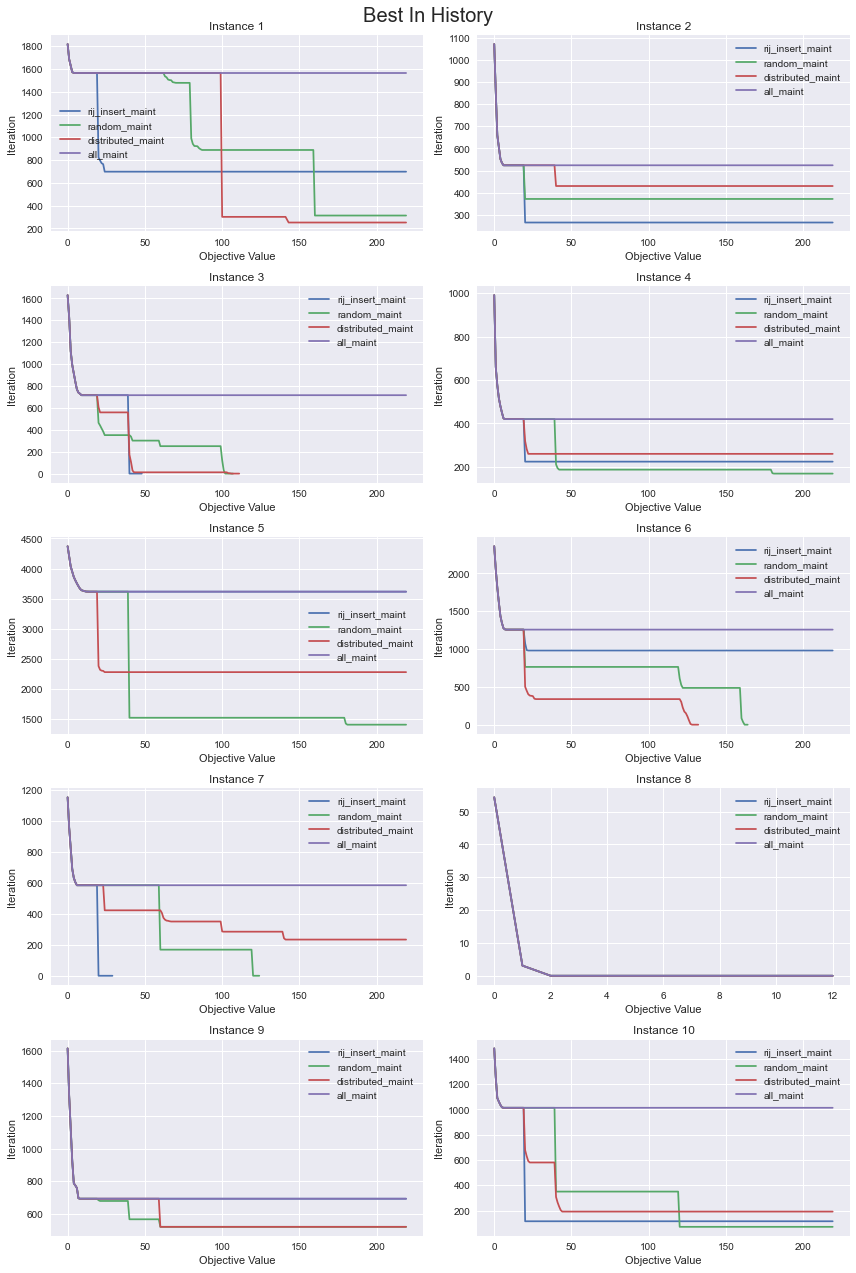

In [60]:
fig = plt.figure(figsize=(12, 18))
ax = fig.subplots(nrows=5, ncols=2)  # sharex='all', sharey='all'
ax = ax.flatten()

record = '_history_best'

for i in range(10):
    for maint_type in maint_types:
        ax[i].plot(json.loads(globals()[maint_type + record + '_df'].iloc[i, 0])[0], label=maint_type)
    ax[i].set_title(f'Instance {i+1}')
    ax[i].set_ylabel('Iteration')
    ax[i].set_xlabel('Objective Value')
    ax[i].legend()

plt.suptitle('Best In History',fontsize=20)
fig.tight_layout()
plt.show()

### 四種保養排成方法

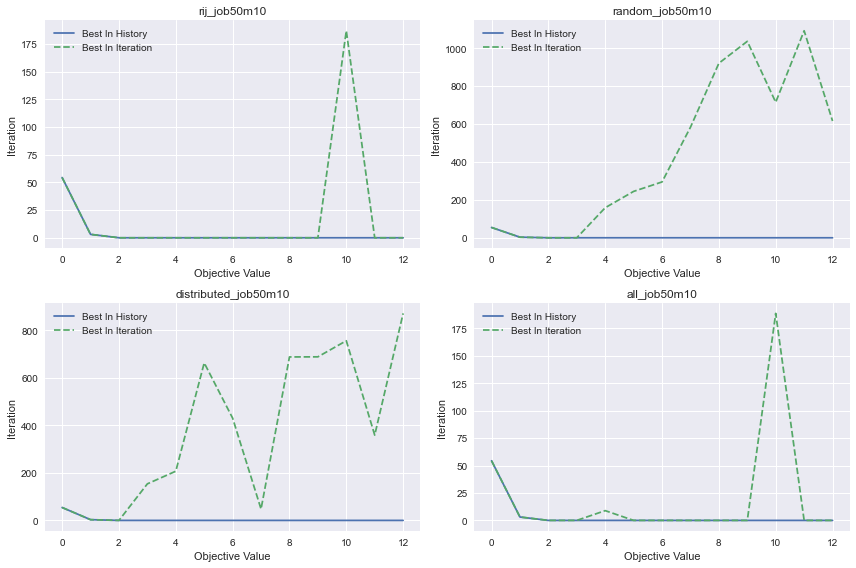

In [62]:
fig = plt.figure(figsize=(12, 8))
ax = fig.subplots(nrows=2, ncols=2)  # sharex='all', sharey='all'
ax = ax.flatten()

record_1 = '_history_best'
record_2 = '_iter'
instance = 7
pair = '_job50m10'

for i, maint_type in enumerate(maint_types):
    ax[i].plot(json.loads(globals()[maint_type + pair + record_1 + '_df'].iloc[instance, 0])[0], label='Best In History')
    ax[i].plot(
        json.loads(globals()[maint_type + pair + record_2 + '_df'].iloc[instance, 0])[0],
        label='Best In Iteration', linestyle='--')
    ax[i].set_title(maint_type + pair)
    ax[i].set_ylabel('Iteration')
    ax[i].set_xlabel('Objective Value')
    ax[i].legend()

fig.tight_layout()
plt.show()

In [219]:
df = pd.read_csv('tabu/0512_allscen/dueweight_all_history_best.csv')

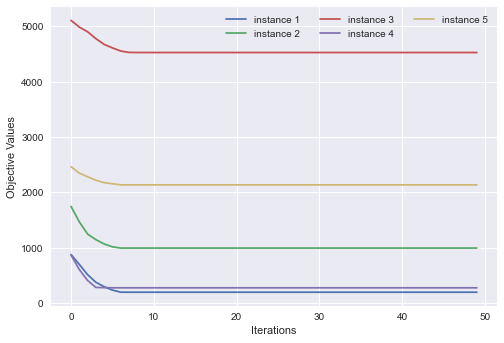

In [220]:
# fig = plt.figure(figsize=(12, 18))
# ax = fig.subplots(nrows=1, ncols=1)  # sharex='all', sharey='all'
# ax = ax.flatten()

record = '_history_best'

for i in range(5):
    plt.plot(json.loads(df.iloc[i, 0])[0][:50], label=f'instance {i+1}')
# ax[i].set_title(f'Instance {i+1}')
# ax[i].set_ylabel('Iteration')
plt.ylabel('Objective Values')
plt.xlabel('Iterations')
plt.legend(ncol=3)

# plt.suptitle('Best In History',fontsize=20)
# fig.tight_layout()
plt.show()